# Lambda School Data Science Module 123

## Introduction to Bayesian Inference
[XKCD 1132](https://www.xkcd.com/1132/)

<div>
<img src="https://imgs.xkcd.com/comics/frequentists_vs_bayesians.png" width="300"/>
</div>

#### Bayes vs. Frequentist inference

| Bayes | Frequentist |
|:---|:---|
|uses probabilities for both hypotheses and data|never uses or gives the probability of a hypothesis (no prior or posterior).|
|depends on the prior and likelihood of observed data.|depends on the likelihood P(D | H)) for both observed and unobserved data.|
|requires one to know or construct a ‘subjective prior’.|does not require a prior.|
|dominated statistical practice before the 20th century.|dominated statistical practice during the 20th century.|

https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/readings/MIT18_05S14_Reading20.pdf

## Cookie Challenge
https://www.greenteapress.com/thinkbayes/thinkbayes.pdf#page20

<div>
<img src="https://food.fnr.sndimg.com/content/dam/images/food/fullset/2009/6/12/2/PASP09_303502_s4x3.jpg.rend.hgtvcom.826.620.suffix/1371589411856.jpeg" width="300"/>
</div>

Suppose there are two bowls of cookies.  
* Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies.  
* Bowl 2 contains 20 vanilla cookies and 20 chocolate cookies.  

What is the probability of randomly drawing a vanilla cookie?

In [26]:
# independent probability of getting a vanilla cookie 
vanilla=30+20
choco=10+20
cookies=vanilla + choco
p_V = vanilla/cookies 
print(p_V)

0.625


Given that I pick from bowl 1, what is the probability of randomly drawing a vanilla cookie?  
`p(vanilla|Bowl 1)`

In [4]:
# conditional probability
p_B1=1 # probability of choosing bowl 1 (prior)
p_VB1=30/40 # probability of getting a vanilla cookie given bowl1
p_B1V=p_VB1*p_B1 # probability of bowl 1 given vanilla
print(p_B1V)

0.75

Now suppose you choose one of the bowls at random and, without looking, select a cookie at random. The cookie is vanilla. What is the probability that it came from Bowl 1?  
`p(Bowl 1|vanilla)`

In [14]:
# conditional probability
p_B1 = .5 # independent probability of choosing bowl 1
p_VB1=.75 # probability of vanilla given bowl 1
p_V = 50/80 # independent probability of getting a vanilla cookie 
p_B1V = (p_B1*p_VB1)/p_V# probability of bowl 1 given vanilla
print(p_B1V)
p_B1V==(.5*.75)/(5/8) # confirm.

0.6


True

**Bayes' theorem:**
$$p(H|D) = \frac{p(H) * p(D|H)}{p(D)}$$

* H is the **hypothesis**  
* D is the observed **data**  
* p(H) is the probability of the hypothesis before we see the data, called the prior probability, or just **prior**.    
* p(D) is the **marginal probability**, likelihood considered independently  
* p(D|H) is the probability of the data under the hypothesis, called the **conditional probability**.   
*  p(H|D) is what we want to compute, the probability of the hypothesis after we see the data, called the **posterior** probability.

$$posterior = \frac{prior * conditional}{marginal}$$


## The Monty Hall Challenge
https://math.ucsd.edu/~crypto/Monty/monty.html

<div>
<img src="http://www.sciencemadesimple.co.uk/files/2016/04/The-choices.png" width="400"/>
</div>

In [27]:
# Let's recreate the game with code.
import random ## Allows us to randomly select which door will have the car at the beginning.

def lets_make_a_deal(door,choice):
    doors = ['A','B','C'] ## Set up our possible doors.
    choices = ['KEEP','SWITCH'] ## Set up our possible choices: K = keep and S = switch.
    car = random.choice(doors) ## Selects which door will have the car.
    if door == car and choice == 'KEEP': ## Chose correctly on first guess and kept first guess --> win.
        result=1
    elif door != car and choice == 'SWITCH': ## Chose incorrectly on first guess, then switched to remaining option --> win.
        result=1
    else: ## Chose correctly, then switched OR chose incorrectly, then kept --> lose.
        result=0
#     print (f'Car was behind {car}. You initally picked {door} and then you decided to {choice}. Points={result}')
    return result

In [28]:
# Choose a door (A, B, C,) and a choice (KEEP, SWITCH)
lets_make_a_deal('B', 'SWITCH')

1

In [29]:
# Play the game 10,000 times. Which strategy is better? (Note: comment out the 'print'!)
wins=0
doors = ['A','B','C']
for x in range(0,10000):
    points=lets_make_a_deal(random.choice(doors), 'SWITCH')
    wins=wins+points
print('total points if switch=', wins)
# reset
wins=0
for x in range(0,10000):
    points=lets_make_a_deal(random.choice(doors), 'KEEP')
    wins=wins+points
print('total points if keep=', wins)

total points if switch= 6632
total points if keep= 3295


Suppose you pick door A. The host opens door B to reveal a goat. Should you switch to door C?  
* prior probability  = 1/3
* marginal probability  = 1/2  
* conditional probability =          (1/2 * 1/3)       +           ( 0 * 1/3)       +           ( 1 * 1/3) = 1/2

In [38]:
prior=.33 
marginal=.5
conditional = (1/2 * 1/3)  + ( 0 * 1/3) + ( 1 * 1/3)
print(conditional)

0.5


In [39]:
# P(car is A | choice is A) = (marginal * prior) / conditional
posterior = (prior * conditional)/marginal 
print(posterior)

0.33


In [41]:
# P(car is C | choice is A) = 1-P(car is A | choice is A)
round(1-posterior,3)

0.67

If we pick a door and then switch after seeing another door opens, the probability of selecting the right door increases from 1/3 to 2/3. It is, based on this information, always in our best interest to switch.

## Bayes' Theorem and the Bayesian mindset

### The Law of Total Probability


By definition, the total probability of all outcomes (events) of some variable (event space) $A$ is 1. That is:

$$P(A) = \sum_n P(A_n) = 1$$

The law of total probability takes this further, considering two variables ($A$ and $B$) and relating their marginal probabilities and their conditional probabilities. 
* marginal probabilities (their likelihoods considered independently, without reference to one another)
* conditional probabilities (their likelihoods considered jointly)  
A marginal probability is simply notated as e.g. $P(A)$, while a conditional probability is notated $P(A|B)$, which reads "probability of $A$ *given* $B$".

The law of total probability states:

$$P(A) = \sum_n P(A | B_n) P(B_n)$$

In words - the total probability of $A$ is equal to the sum of the conditional probability of $A$ on any given event $B_n$ times the probability of that event $B_n$, and summed over all possible events in $B$.





### The Law of Conditional Probability

What's the probability of something conditioned on something else? To determine this we have to go back to set theory and think about the intersection of sets:

The formula for actual calculation:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

![Visualization of set intersection](https://upload.wikimedia.org/wikipedia/commons/9/99/Venn0001.svg)

Think of the overall rectangle as the whole probability space, $A$ as the left circle, $B$ as the right circle, and their intersection as the red area. Try to visualize the ratio being described in the above formula, and how it is different from just the $P(A)$ (not conditioned on $B$).

We can see how this relates back to the law of total probability - multiply both sides by $P(B)$ and you get $P(A|B)P(B) = P(A \cap B)$ - replaced back into the law of total probability we get $P(A) = \sum_n P(A \cap B_n)$.

This may not seem like an improvement at first, but try to relate it back to the above picture - if you think of sets as physical objects, we're saying that the total probability of $A$ given $B$ is all the little pieces of it intersected with $B$, added together. The conditional probability is then just that again, but divided by the probability of $B$ itself happening in the first place.


### Bayes Theorem

$$P(A|B) = \frac{P(B|A)* P(A)}{P(B)}$$

In words - the probability of $A$ conditioned on $B$ is the probability of $B$ conditioned on $A$, times the probability of $A$ and divided by the probability of $B$. 


### Using Bayes Theorem Iteratively (repeated testing)


There are many ways to apply Bayes' theorem, such as drug tests. You may think that a drug test that is 100% accurate for true positives (detecting somebody who is a user) is pretty good, but what if it also has 1% false positive rate (indicating somebody is a user when they're not)? And furthermore, the rate of drug use in the population at large (and thus our prior belief) is 1/200.

What is the likelihood somebody really is a user if they test positive? Some may guess it's 99% - the difference between the true positives and the false positives. But we have a prior belief of the background/true rate of drug use. Sounds like a job for Bayes' theorem!

![Bayes Theorem Drug Test Example](https://wikimedia.org/api/rest_v1/media/math/render/svg/95c6524a3736c43e4bae139713f3df2392e6eda9)

In other words, the likelihood that somebody is a user given they tested positive on a drug test is only 33.2% - probably much lower than you'd guess. This is why, in practice, it's important to use repeated testing to confirm. If we have the same individual who tested positive the first time take the drug test a second time then the posterior probability from our the first test becomes our new prior during the second application. What is the probability that a person is a drug user after two positive drug tests in a row?

Bayes' theorem has been relevant in court cases where proper consideration of evidence was important. Whether it's a drug test, breathalyzer, pregnancy test, doctor's diagnosis, or neutrino detector, we have to take into account **both** the false positive rate and our prior probability in order to calculate the correct conditional probability.

* P(+|User) = 1 - True Positive Rate

* P(User) = 1/200 Prior probability

* P(+|Non-user) = False Positive rate

You only need the above three numbers in order to calculate bayes rule  

In [44]:
P_user = 1/200 # prior belief
P_non_user = 1 - P_user  # complement of the prior belief
P_pos_given_user = 1 # this is the true positive rate
P_pos_given_non_user = .01 # this is the false positive rate

# My first iteration of Bayes Rule (Bayes Theorem)
numerator = P_pos_given_user*P_user
marginal = (P_pos_given_user*P_user) + (P_pos_given_non_user*P_non_user)
posterior_probability = numerator/marginal

print(posterior_probability)

0.33444816053511706


In [45]:
# We have the same person take the drug test again, and they test positive again
# Now what is the likelihood that they are a drug user?
# The posterior probability from the first test becomes our prior for the second iteration.

P_user = posterior_probability # save posterior from first iteration as a new prior
P_non_user = 1 - P_user # calculate the complement of that prior via the law of total probability

# apply Bayes' theorem
numerator = P_pos_given_user*P_user
marginal = (P_pos_given_user*P_user) + (P_pos_given_non_user*P_non_user)
posterior_probability = numerator/marginal
print(posterior_probability)

0.9804882831650161


In [70]:
# Now the third test
P_user = posterior_probability # save posterior from first iteration as a new prior
P_non_user = 1 - P_user # calculate the complement of that prior via the law of total probability

# apply Bayes' theorem
numerator = P_pos_given_user*P_user
marginal = (P_pos_given_user*P_user) + (P_pos_given_non_user*P_non_user)
posterior_probability = numerator/marginal
print(posterior_probability)

0.9998010395931209


In [85]:
# Fourth test
P_user = posterior_probability # save posterior from first iteration as a new prior
P_non_user = 1 - P_user # calculate the complement of that prior via the law of total probability

# apply Bayes' theorem
numerator = P_pos_given_user*P_user
marginal = (P_pos_given_user*P_user) + (P_pos_given_non_user*P_non_user)
posterior_probability = numerator/marginal
print(posterior_probability)

0.9999999801000005


In [91]:
# Turn all of that into a function
def prob_drug_use(prob_drug_prior, false_positive_rate, true_positive_rate, number_of_tests):
    posterior_probability=prob_drug_prior
    for test in range(0, number_of_tests):
        P_user = posterior_probability # prior belief
        P_non_user = 1 - P_user  # complement of the prior belief
        P_pos_given_user = false_positive_rate # this is the true positive rate
        P_pos_given_non_user = true_positive_rate # this is the false positive rate
        posterior_probability = (P_pos_given_user*P_user)/((P_pos_given_user*P_user) + (P_pos_given_non_user*P_non_user))
    return posterior_probability

In [95]:
# try it out
prob_drug_use(1/200, 1, .01, 1)

0.33444816053511706

## Calculating Bayesian Confidence

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bayes_mvs.html  

#### Example 1. Using random number generator

In [53]:
from scipy import stats
import numpy as np

# Set Random Seed for Reproducibility
np.random.seed(seed=42)

coinflips = np.random.binomial(n=1, p=.5, size=100)
print(coinflips)

[0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0
 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1
 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0]


In [54]:
# FREQUENTIST APPROACH
# calculate a 95% confidence interval on either side of this.

conf_freq=stats.t.interval(0.95,                    # alpha (ie, confidence level)
                 len(coinflips),                 # length of sample
                 loc = np.mean(coinflips),      # sample mean
                 scale = stats.sem(coinflips) # std error of the mean
                 )
conf_freq

(0.37048129875673796, 0.569518701243262)

In [55]:
# BAYESIAN APPROACH
conf_bayes=stats.bayes_mvs(coinflips, alpha=.95)[0][1] # alpha is the confidence level for this equation
conf_bayes

(0.37046898750173674, 0.5695310124982632)

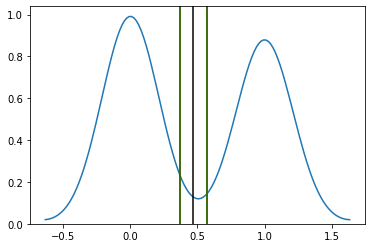

In [59]:
# plot on graph with kernel density estimate
sns.kdeplot(coinflips)
# plt.xlim(.3703, .3705)
plt.axvline(x=conf_freq[0], color='red')
plt.axvline(x=conf_freq[1], color='red')
plt.axvline(x=conf_bayes[0], color='green')
plt.axvline(x=conf_bayes[1], color='green')
plt.axvline(x=np.mean(coinflips), color='k');

#### Example 2. Using pandas dataframe

In [10]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")

In [13]:
# mean age
df['age'].mean()

38.58164675532078

In [33]:
# FREQUENTIST APPROACH
# calculate a 95% confidence interval on either side of this.

conf_freq=stats.t.interval(0.95,                    # alpha (ie, confidence level)
                 df.shape[0],                 # length of sample
                 loc = df['age'].mean(),      # sample mean
                 scale = stats.sem(df['age']) # std error of the mean
                 )
conf_freq

(38.433482476875845, 38.72981103376572)

In [34]:
# BAYESIAN APPROACH
conf_bayes=stats.bayes_mvs(df['age'], alpha=.95)[0][1] # alpha is the confidence level for this equation
conf_bayes

(38.433490259580736, 38.72980325106083)

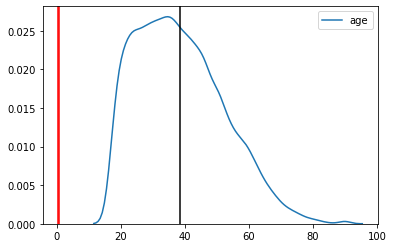

In [58]:
# plot on graph with kernel density estimate
sns.kdeplot(df['age'])
# plt.xlim(38,39)
plt.axvline(x=conf_freq[0], color='red')
plt.axvline(x=conf_freq[1], color='red')
# plt.axvline(x=conf_bayes[0], color='green')
# plt.axvline(x=conf_bayes[1], color='green')
plt.axvline(x=df['age'].mean(), color='k');

## Pregnancy Test Example

The **prior** is our belief in the model given no additional information. This model could be as simple as a statistic, such as the mean we're measuring, or a complex regression.  
The **likelihood** is the probability of the data we observed occurring given the model.   
The **marginal probability** of the data is the probability that our data are observed regardless of what model we choose or believe in. You divide the likelihood by this value to ensure that we are only talking about our model within the context of the data occurring. 

Imagine that we have a suspicion that someone is pregnant. We might use a pregnancy test to determine whether or not that's the case. Consider the following:

1) Our hypothesis, $H$, is that this person is pregnant.   
2) A positive result on the pregnancy test is denoted as $D$.   
3) We'll consider some "information" about the world: $p(H) = 0.125$  
**prior**: on average, 12.5 percent of women are pregnant (not accurate, but useful for our purposes here).  
**marginal**: $p(D) = 0.14$ — Fourteen percent of people who take the pregnancy test come back with a positive result.  
**likelihood**: $p(D|H) = 0.85$ — The likelihood states, "How likely would we get data that look like this if our hypothesis was true?" In other words, how accurate is our test?    
**Estimate how likely it is that a woman who got a positive result is actually be pregnant using Bayes' theorem.**  
We've got a decent chance of the results being accurate, but not 100 percent — that means that our posterior probability of somebody being pregnant, ($H=1$), given the data that we've seen (a positive result on the test) is 0.759 percent.

In [42]:
# In Python:

def bayes(conditional, prior, marginal):
    return (conditional * prior) / float(marginal)

posterior = bayes(0.85, 0.125, 0.14)
posterior

0.7589285714285713

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)